#### **Exercise 1:**

Repeat the curve fitting example with the following modifications:

 - choose some other function
 - first write the data to a file, then read it (with numpy, for example)
 - produce the picture that has axes, name and legend

[1.12792653 0.75324558]


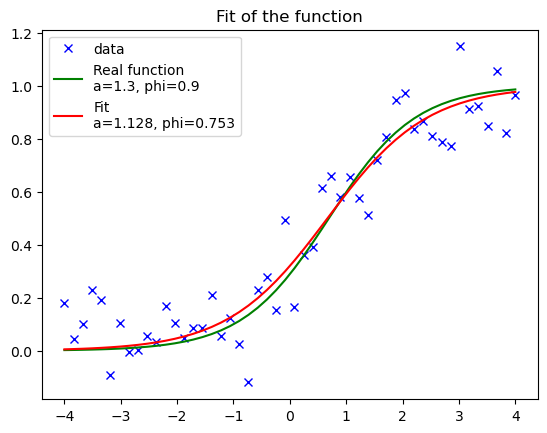

In [40]:
from scipy import optimize

np.random.seed(0)

# Let's generate fake data that we can "fit" then 
def f(x, a, phi):
    # return np.cos(a * x + phi)
    return 1 / (1 + np.exp(-a * x + phi))

#random makes it look like experimental data
x = np.linspace(-4, 4, 50)
y_save = f(x, 1.3, 0.9) + .1*np.random.normal(size=50)

# Save to file
np.savetxt('mydata.txt', np.column_stack((x,y_save)))

# Read from file 
loaded = np.genfromtxt('mydata.txt')
x=loaded[:,0]
y=loaded[:,1]

# Now fit the model: the parameters omega and phi can be found in the
# `params` vector
params, params_cov = optimize.curve_fit(f, x, y)

print(params)

# plot the data and the fitted curve
plt.plot(x, y, 'bx', label='data')
plt.plot(x,f(x,1.3,0.9),'g-',label='Real function\na=1.3, phi=0.9')
plt.plot(x, f(x, *params), 'r-', label=f'Fit\na={params[0]:.3f}, phi={params[1]:.3f}')
plt.legend()
plt.title('Fit of the function')
plt.show()

#### **Exercise 2:**

Integrate the function `x**2 + 10*np.sin(x)` on the interval `[-10,10]`.
Find a way to make a plot like in textbooks where you color the area under the curve that you integrate.
Now integrate the same function symbolically using `sympy`, then put borders into it and compare the results.

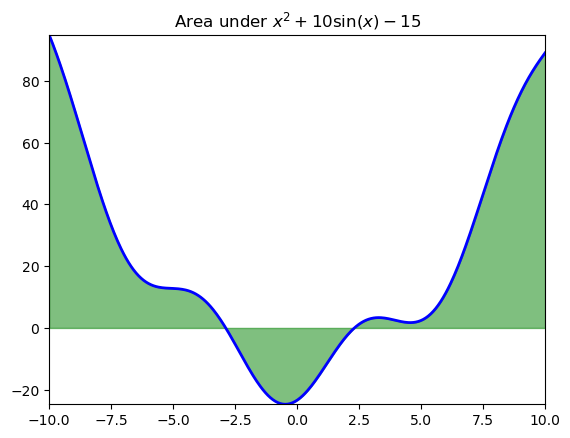

Numerical integration result: 375.82222626539397


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#I changed it a little bit
def f(x):
    return x**2 + 10*np.sin(x-1) - 15

#here the second value returned is an error that we now don't care about
#the underscore is often used in python as a "throwaway variable"
result, _ = quad(f, -10, 10)

x = np.linspace(-10, 10, 400)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'blue', linewidth=2)
ax.fill_between(x, y, color='green', alpha=0.5)
ax.set_xlim([-10, 10])
ax.set_ylim([min(y), max(y)])
ax.set_title("Area under $x^2 + 10 \sin(x) -15$")
plt.show()

print("Numerical integration result:", result)

In [8]:
import sympy as sp

x = sp.symbols('x')

expr = x**2 + 10*sp.sin(x-1) -15

integral_symb = sp.integrate(expr, x)

definite_integral = sp.integrate(expr, (x, -10, 10))

print("Symbolic integral:", integral_symb)
print("Definite integral from -10 to 10:", definite_integral.evalf())

Symbolic integral: x**3/3 - 15*x - 10*cos(x - 1)
Definite integral from -10 to 10: 375.822226265394


#### **Exercise 3**

With the help of documentation find 3 different ways to interpolate data produced from the function 
`np.cos(-x**2/9.0)`. 
Create a class called "My_Interpolation" with these 3 interpolation methods.

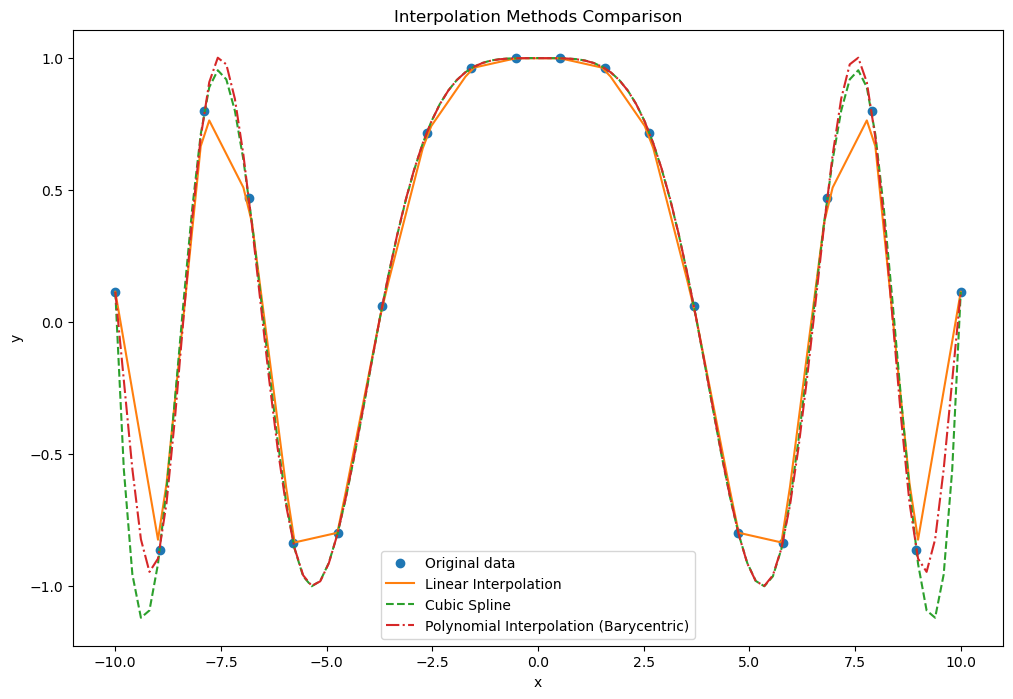

In [9]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

class My_Interpolation:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def linear_interpolation(self, points):
        linear_interp = interpolate.interp1d(self.x, self.y)
        return linear_interp(points)

    def cubic_spline(self, points):
        cubic_spline_interp = interpolate.CubicSpline(self.x, self.y)
        return cubic_spline_interp(points)

    def polynomial_interpolation(self, points):
        poly_interp = interpolate.BarycentricInterpolator(self.x, self.y)
        return poly_interp(points)

x = np.linspace(-10, 10, num=20)
y = np.cos(-x**2 / 9.0)

# we need an instance of the class
interpolator = My_Interpolation(x, y)

points = np.linspace(-10, 10, num=100)

linear_results = interpolator.linear_interpolation(points)
cubic_results = interpolator.cubic_spline(points)
polynomial_results = interpolator.polynomial_interpolation(points)

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'o', label='Original data')
plt.plot(points, linear_results, '-', label='Linear Interpolation')
plt.plot(points, cubic_results, '--', label='Cubic Spline')
plt.plot(points, polynomial_results, '-.', label='Polynomial Interpolation (Barycentric)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation Methods Comparison')
plt.show()



#### **Exercise 4:**
Give students in the `example.csv` file a bonus of 5 for all the courses. Find a way to replace all the values that are now greater than 30 by 30. Save the new data to a file. Make a plot with histograms for every course in the example file.

In [14]:
df = pd.read_csv('../data/example.csv', index_col=0)
df

,course1,course2,course3,course4
name,,,,
Marie,24,18,30,20
John,18,27,29,27
Kati,21,24,28,27
Olaf,30,30,29,30
Mark,24,25,27,21
Olga,23,26,30,30
Jean,18,28,26,24
Alex,19,20,27,27
Pier,24,29,23,26


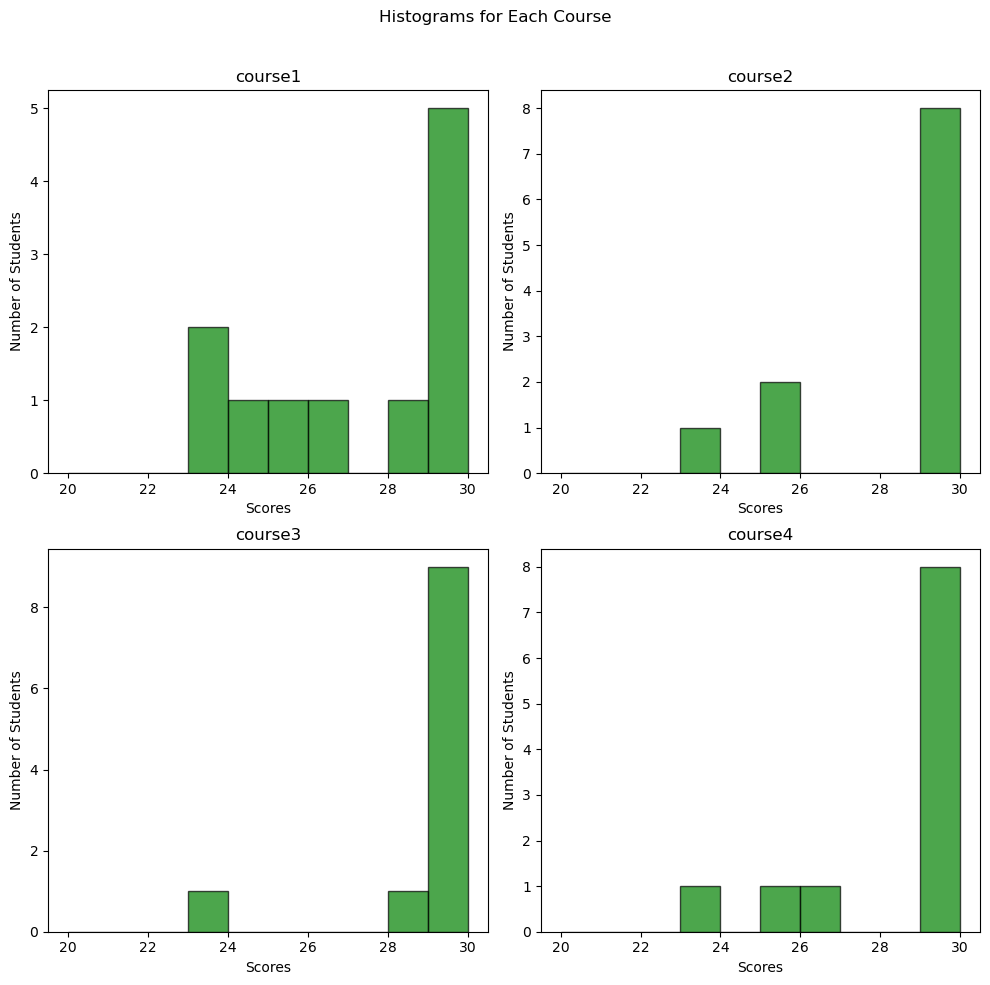

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# put the names into index
df = pd.read_csv('../data/example.csv', index_col=0)

# Add a bonus of 5 to all courses
df += 5

# cap at 30
df[df > 30] = 30

df.to_csv('../data/modified_example.csv')

# determine dimensions of the grid if we want a nice plot
num_courses = len(df.columns)
num_rows = math.ceil(np.sqrt(num_courses))
num_cols = math.ceil(num_courses / num_rows)

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))
fig.suptitle('Histograms for Each Course')


axes = axes.flatten()

# Plot histograms for every course
for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=range(20, 31, 1), alpha=0.7, edgecolor="black", color='g')
    axes[i].set_title(col)
    axes[i].set_xlabel('Scores')
    axes[i].set_ylabel('Number of Students')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.9) 
plt.show()



Or you can avoid styling things and just trust pandas to plot as it pleases (and it's good enough, actually)

<Axes: ylabel='Frequency'>

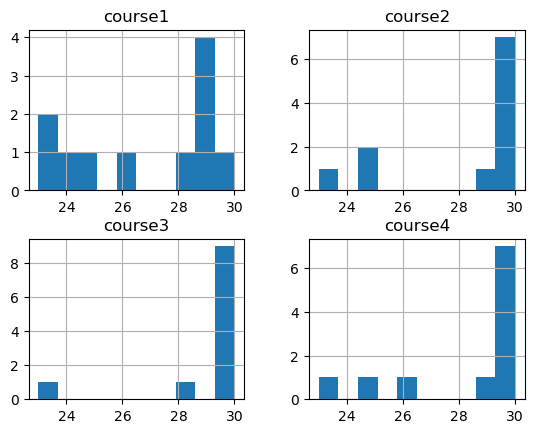

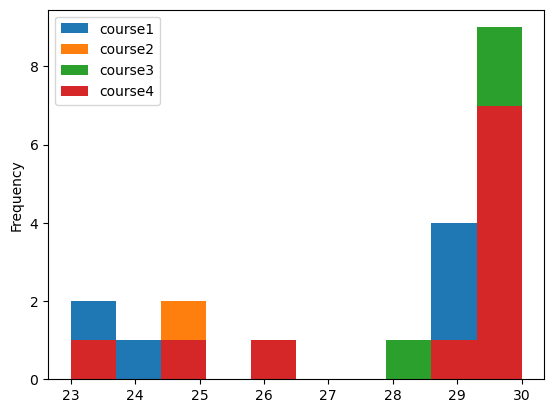

In [36]:
# Read from file
dt = pd.read_csv('../data/example.csv', sep=',', index_col=0)

# Added the bonus
dt = dt + 5

# Replace greater than 30 to 30
dt[dt > 30] = 30

# Save to file
dt.to_csv('../data/example_modified.csv')

# plot a histogram
dt.hist()
dt.plot(kind='hist')

#### **Exercise 5:**

 - Read in the `cars.csv` file as a dataframe
 - Remove the row with the index 3, which contains a quote in the Model column.
 - Add a new column called Price with the following values: [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500, 7800]
 - Find the average Length of all the vehicles.
 - Find the median Price of all the vehicles.
 - Create a new dataframe that only contains the rows where the Price is greater than 7000.
 - Sort the dataframe in descending order by the Price column.


In [32]:
# Read in the `cars.csv` file as a dataframe
dt = pd.read_csv('../data/cars.csv', sep=',')
print('dt Initial')
display(dt)

# Remove the row with the index 3, which contains a quote in the Model column.
dt.drop(2, inplace=True, axis='rows')

# Add a new column called Price with the given values
# Warning : the number of rows to add not match with the number of rows in the dataframe
#cause we changed it
# dt['Prices = [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500, 7800]
dt['Prices'] = [8000, 6500, 7000, 6800, 7500, 7300, 7000, 9000, 6500]

# Find the average Length of all the vehicles.
print('Average length =', dt['Length'].mean())

# Find the median Price of all the vehicles.
print('Median price =', dt['Prices'].median())

# Create a new dataframe that only contains the rows where the Price is greater than 7000.
dt2 = dt[dt['Prices'] > 7000]

# Display the dataframe dt2
print('dt2 ')
display(dt2)

# Sort the dataframe in descending order by the Price column.
dt.sort_values(by='Prices', ascending=False, inplace=True)
print('dt sorted')
dt

dt Initial


,Year,Make,Model,Length
0,1997,Ford,E350,2.34
1,2000,Mercury,Cougar,2.38
2,1993,Chevrolet,"Venture ""Extended Edition""",3.20
3,1999,Jeep,Grand Cherokee,2.56
4,1998,Dodge,Intrepid,3.01
5,1997,Ford,E350,2.34
6,1999,Ford,E350,2.34
7,1996,Ford,Mustang,2.37
8,2000,Ford,Mustang,2.34
9,1997,Ford,Taurus,2.34


Average length = 2.4466666666666668
Median price = 7000.0
dt2 


,Year,Make,Model,Length,Prices
0,1997,Ford,E350,2.34,8000
5,1997,Ford,E350,2.34,7500
6,1999,Ford,E350,2.34,7300
8,2000,Ford,Mustang,2.34,9000


dt sorted


,Year,Make,Model,Length,Prices
8,2000,Ford,Mustang,2.34,9000
0,1997,Ford,E350,2.34,8000
5,1997,Ford,E350,2.34,7500
6,1999,Ford,E350,2.34,7300
3,1999,Jeep,Grand Cherokee,2.56,7000
7,1996,Ford,Mustang,2.37,7000
4,1998,Dodge,Intrepid,3.01,6800
1,2000,Mercury,Cougar,2.38,6500
9,1997,Ford,Taurus,2.34,6500


#### **Exercise 6:**
 - create a random matrix with numpy
 - save it to file
 - read it back with numpy
 - calculate some statistcs on it with numpy 
 - read the same file with pandas
 - calculate the same statistics on it with pandas

In [11]:
import numpy as np
import pandas as pd

# Create a random matrix with NumPy
random_matrix = np.random.rand(5, 5)

# Save it to a file
np.savetxt('random_matrix.csv', random_matrix, delimiter=',')

# Read it back with NumPy
loaded_matrix = np.loadtxt('random_matrix.csv', delimiter=',')

# Calculate some statistics on it with NumPy
mean_np = np.mean(loaded_matrix)
std_dev_np = np.std(loaded_matrix)
max_value_np = np.max(loaded_matrix)
min_value_np = np.min(loaded_matrix)

print("NumPy Statistics:")
print("Mean:", mean_np)
print("Standard Deviation:", std_dev_np)
print("Maximum Value:", max_value_np)
print("Minimum Value:", min_value_np)

# Read the same file with Pandas
df = pd.read_csv('random_matrix.csv', header=None)

# Calculate the same statistics on it with Pandas
mean_pd = df.mean().mean()
std_dev_pd = df.stack().std()
max_value_pd = df.max().max()
min_value_pd = df.min().min()

print("\nPandas Statistics:")
print("Mean:", mean_pd)
print("Standard Deviation:", std_dev_pd)
print("Maximum Value:", max_value_pd)
print("Minimum Value:", min_value_pd)


NumPy Statistics:
Mean: 0.4808567067229572
Standard Deviation: 0.29847939797018036
Maximum Value: 0.9816807069688875
Minimum Value: 0.00940401457186113

Pandas Statistics:
Mean: 0.4808567067229573
Standard Deviation: 0.30463425990002285
Maximum Value: 0.9816807069688877
Minimum Value: 0.00940401457186113
